# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [209]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [210]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [211]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [212]:
# Create a Beautiful Soup Object
html = browser.html
html_soup = soup(html, 'html.parser')


In [213]:
# Extract all rows of data
table = html_soup.find('table', class_='table')
headers = table.find_all('th')
rows = table.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [214]:
# Create an empty list
rows_list = []
headers_list = []

# Loop through the scraped data to create a list of rows
for header in headers:
    title = header.text
    headers_list.append(title)

for row in table.find_all('tr',class_='data-row'):
        data = row.find_all('td')
        rows_list.append([td.text.strip() for td in data])
rows_list


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [215]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(rows_list, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [216]:
# Confirm DataFrame was created successfully
weather_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [217]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [218]:
# Change data types for data analysis
weather_df['id']=weather_df['id'].astype(int)
weather_df['terrestrial_date']=pd.to_datetime(weather_df['terrestrial_date'])
weather_df['sol']=weather_df['sol'].astype(int)
weather_df['ls']=weather_df['ls'].astype(int)
weather_df['month']=weather_df['month'].astype(int)
weather_df['min_temp']=weather_df['min_temp'].astype(float)
weather_df['pressure']=weather_df['pressure'].astype(float)

In [219]:
# Confirm type changes were successful by examining data types again
weather_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [220]:
# 1. How many months are there on Mars?
months = weather_df['month'].nunique()
print(f'Mars has {months} months')

Mars has 12 months


In [221]:
# 2. How many Martian days' worth of data are there?
days = weather_df['sol'].nunique()
print(f'There are {days} martian days worth of data in the dataset')


There are 1867 martian days worth of data in the dataset


In [222]:
# 3. What is the average low temperature by month?
avg_low_temp = []
for i in range(1,months+1):
    weather_per_month = {'Month': '', 'Average Low Temp':''}
    avg_min_temp_month = weather_df.loc[weather_df['month']==i]['min_temp'].mean()
    weather_per_month['Month'] = i
    weather_per_month['Average Low Temp'] = avg_min_temp_month
    avg_low_temp.append(weather_per_month)

# Create DF from list
temp_by_month_df = pd.DataFrame(avg_low_temp)

for month in avg_low_temp:
    print('Month', month['Month'],':', month['Average Low Temp'].round(1))

Month 1 : -77.2
Month 2 : -79.9
Month 3 : -83.3
Month 4 : -82.7
Month 5 : -79.3
Month 6 : -75.3
Month 7 : -72.3
Month 8 : -68.4
Month 9 : -69.2
Month 10 : -72.0
Month 11 : -72.0
Month 12 : -74.5


Text(0.5, 1.0, 'Mars Average Low Temperature by Month')

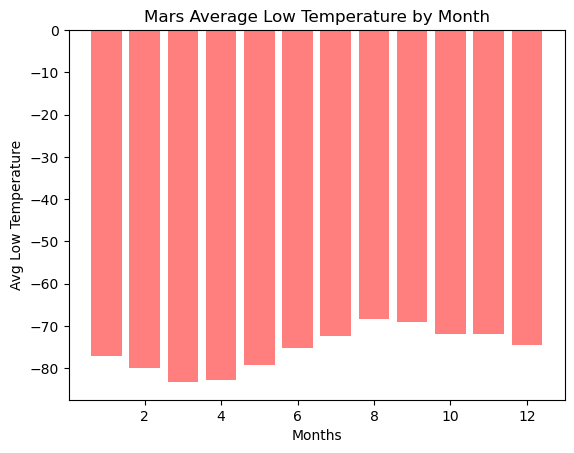

In [231]:
# Plot the average temperature by month
plt.bar(temp_by_month_df['Month'],
        temp_by_month_df['Average Low Temp'], color='red', alpha=0.5)
plt.xlabel("Months")
plt.ylabel("Avg Low Temperature")
plt.title('Mars Average Low Temperature by Month')


In [232]:
# Identify the coldest and hottest months in Curiosity's location
coldest_temp = temp_by_month_df['Average Low Temp'].min()
coldest_month = temp_by_month_df.loc[temp_by_month_df['Average Low Temp'] == coldest_temp, ['Month']]

hottest_temp = temp_by_month_df['Average Low Temp'].max()
hottest_month = temp_by_month_df.loc[temp_by_month_df['Average Low Temp'] == hottest_temp, ['Month']]
hottest_month

# Print results
print('Coldest month:', int(coldest_month['Month']), '- Average Temperature: ', round(coldest_temp, 1),
      '\nHottest month:', int(hottest_month['Month']),'- Average Temperature: ', round(hottest_temp, 1))

Coldest month: 3 - Average Temperature:  -83.3 
Hottest month: 8 - Average Temperature:  -68.4


In [234]:
# 4. Average pressure by Martian month
avg_pressure = []
for i in range(1, months+1):
    pressure_per_month = {'Month': '', 'Pressure': ''}
    avg_pressure_month = weather_df.loc[weather_df['month'] == i]['pressure'].mean(
    )
    pressure_per_month['Month'] = i
    pressure_per_month['Pressure'] = avg_pressure_month
    avg_pressure.append(pressure_per_month)

for month in avg_pressure:
    print('Month', month['Month'], ':', month['Pressure'].round(1))


Month 1 : 862.5
Month 2 : 889.5
Month 3 : 877.3
Month 4 : 806.3
Month 5 : 748.6
Month 6 : 745.1
Month 7 : 795.1
Month 8 : 873.8
Month 9 : 913.3
Month 10 : 887.3
Month 11 : 857.0
Month 12 : 842.2


Text(0.5, 1.0, 'Mars Average Pressure by Month')

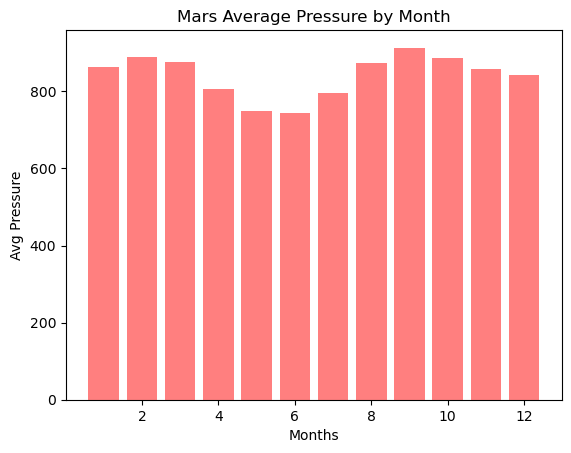

In [235]:
# Plot the average pressure by month
pressure_by_month_df = pd.DataFrame(avg_pressure)
plt.bar(pressure_by_month_df['Month'],
        pressure_by_month_df['Pressure'], color='red', alpha=0.5)
plt.xlabel("Months")
plt.ylabel("Avg Pressure")
plt.title('Mars Average Pressure by Month')

In [236]:
# Create DF from list
avg_pressure_df = pd.DataFrame(avg_pressure)

# Identify the highest and lowest pressure months in Curiosity's location
low_pressure = avg_pressure_df['Pressure'].min()
low_pressure_month = avg_pressure_df.loc[avg_pressure_df['Pressure'] == low_pressure, [
    'Month']]

high_pressure = avg_pressure_df['Pressure'].max()
high_pressure_month = avg_pressure_df.loc[avg_pressure_df['Pressure'] == high_pressure, [
    'Month']]

# Print results
print('Highest Pressure:', int(high_pressure_month['Month']), '- Average Pressure: ', round(high_pressure, 1),
      '\nLowest Pressure:', int(low_pressure_month['Month']),'- Average Pressure: ', round(low_pressure, 1))

Highest Pressure: 9 - Average Pressure:  913.3 
Lowest Pressure: 6 - Average Pressure:  745.1


One martian year lasts 687 terrestrial days


Text(0.5, 1.0, 'Mars Temperature by Day')

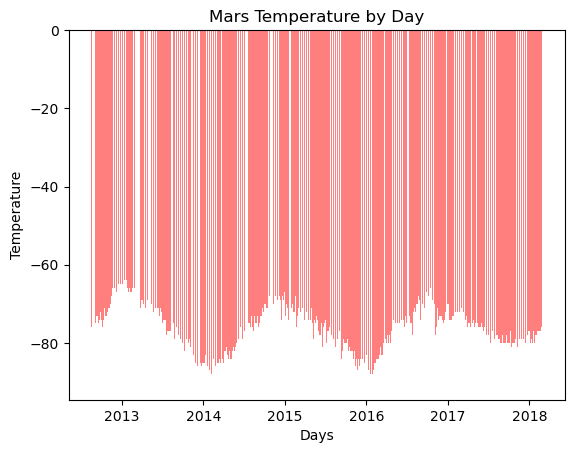

In [242]:
# 5. How many terrestrial (earth) days are there in a Martian year?
start_ls = weather_df['ls'].loc[0]
end_ls = weather_df.loc[weather_df['ls']==start_ls]
date1 = end_ls['terrestrial_date'].iloc[0]
date2 = end_ls['terrestrial_date'].iloc[2]
total_days = date2-date1
total_days = total_days

print(f'One martian year lasts', "%d" %
      total_days.days, 'terrestrial days')

# temp_by_day_df = pd.DataFrame(weather_df)
plt.bar(weather_df['terrestrial_date'],
        weather_df['min_temp'], color='red', alpha=0.5)
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.title('Mars Temperature by Day')


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [229]:
# Write the data to a CSV
weather_df.to_csv('CSV/weather_df.csv')


In [230]:
browser.quit()